In [3]:
import scipy
import torch
mat = scipy.io.loadmat('H.mat')




In [8]:
import numpy as np
img = np.array(mat['imag'])

In [22]:
np.array(mat['parameter']).shape

(24800, 7)

In [16]:
mat['real'].shape

(24800, 301)

In [17]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jul  9 00:02:00 2020',
 '__version__': '1.0',
 '__globals__': [],
 'imag': array([[ 3.5292255e-01,  3.8196382e-01,  4.1076733e-01, ...,
         -3.3795488e-01, -2.9083769e-01, -2.4699956e-01],
        [ 1.5549117e-01,  1.8647005e-01,  2.1742276e-01, ...,
          2.0997937e-01,  2.2129116e-01,  2.3223738e-01],
        [ 1.6689520e-01,  1.9691504e-01,  2.2691980e-01, ...,
          3.5835825e-01,  3.1091876e-01,  2.6366308e-01],
        ...,
        [ 4.1270948e-01,  4.4478156e-01,  4.7651205e-01, ...,
         -1.8417086e-04,  1.3811996e-03,  3.2876710e-03],
        [ 2.8111640e-01,  3.1262937e-01,  3.4397409e-01, ...,
          5.4142652e-01,  6.1539289e-01,  6.8314246e-01],
        [ 2.1243249e-01,  2.4427965e-01,  2.7601597e-01, ...,
         -3.9527260e-01, -4.2329819e-01, -4.5047482e-01]]),
 'parameter': array([[3.  , 0.8 , 4.61, ..., 0.85, 2.52, 2.14],
        [3.  , 0.93, 4.37, ..., 0.53, 1.27, 1.04],
   

In [4]:
mat2 = scipy.io.loadmat('freeform.mat')
mat2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jul  9 00:20:36 2020',
 '__version__': '1.0',
 '__globals__': [],
 'imag': array([[ 0.4519814 ,  0.48305637,  0.51370626, ...,  0.11583228,
          0.14151892,  0.17218602],
        [-0.00647189,  0.02185866,  0.05034382, ..., -0.05997648,
         -0.03304805, -0.0068573 ],
        [-0.05503095, -0.02676941,  0.00168447, ...,  0.16449708,
          0.16433527,  0.16204542],
        ...,
        [ 0.17731086,  0.20695215,  0.23657627, ...,  0.03062588,
          0.03393458,  0.03570032],
        [ 0.02236756,  0.05211965,  0.08195775, ..., -0.58326322,
         -0.61307049, -0.64222937],
        [ 0.1128649 ,  0.14348767,  0.1741387 , ...,  0.27818422,
          0.23139683,  0.18533819]]),
 'parameter': array([[3.  , 1.  , 4.88],
        [2.64, 0.62, 4.35],
        [2.87, 0.59, 4.74],
        ...,
        [2.61, 0.8 , 4.26],
        [2.68, 0.83, 4.88],
        [2.53, 0.82, 4.98]]),
 'pattern': array([[[0, 0, 0, 

In [33]:
img = mat2['pattern'].transpose(2,0,1)

In [37]:
img[:122418,:32,:32].shape

(122418, 32, 32)

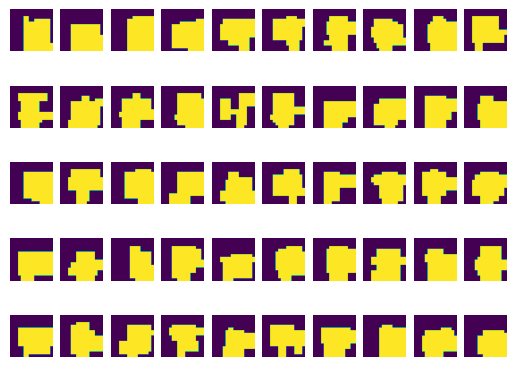

In [38]:
from matplotlib import pyplot as plt
for i, image in enumerate(img[:50,:32,:32]):
    plt.subplot(5, 10, i+1)
    plt.imshow(image)
    plt.axis('off')

In [28]:

mat2['parameter']

array([[3.  , 1.  , 4.88],
       [2.64, 0.62, 4.35],
       [2.87, 0.59, 4.74],
       ...,
       [2.61, 0.8 , 4.26],
       [2.68, 0.83, 4.88],
       [2.53, 0.82, 4.98]])

In [41]:
real = mat2['real']

In [48]:
imag = mat2['imag']
para = mat2['parameter']

In [8]:
import numpy as np
data = np.load('/home/housen/meta-diffusion/meta/UNet_meta-1000_steps-250-sampling_steps-class_condn_-1_6.npz')

In [9]:
data['arr_1'].shape

(500, 605)

In [53]:
import numpy as np
np.concatenate((real,imag,para),axis=1)[5].shape

(605,)

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import Dataset
import os
class metaDataset(Dataset):
    def __init__(self, data_dir,split, transform=None):
        mat = scipy.io.loadmat(os.path.join(data_dir, "freeform.mat"))
        if split == 'train':
            self.img_labels = np.concatenate((mat['real'],mat['imag'],mat['parameter']),axis=1)[:122418]
            self.img = mat['pattern'].transpose(2,0,1)[:122418,:32,:32]
            self.transform = transform
        elif split == 'val':
            self.img_labels = np.concatenate((mat['real'],mat['imag'],mat['parameter']),axis=1)[122418:]
            self.img = mat['pattern'].transpose(2,0,1)[122418:,:32,:32]
            self.transform = transform
    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = self.img[idx]
        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [ ]:
transform_train = transforms.Compose(
            [
                transforms.ToTensor()
            ]
        )
train_set = metaDataset(./,'train',transform_train)

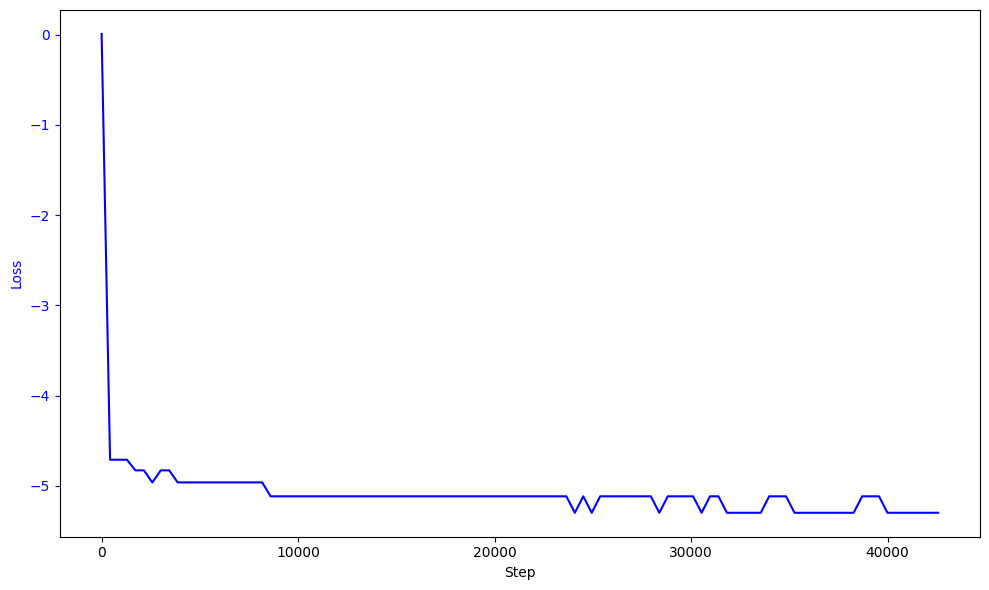

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# 从文本文件中读取数据
data = []
with open('trainbig.log', 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) >= 4:
            step = int(parts[1].split('/')[0].split(':')[-1])
            loss = float(parts[2].split(':')[-1])
            hours = float(parts[3].split(':')[-1][:-3])
            data.append((step, loss, hours))

# 提取步数、损失和经过时间
steps, losses, hours = zip(*data)

# 创建图形
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制损失曲线
ax1.plot(steps, np.log(losses), color='b', label='Loss')
ax1.set_xlabel('Step')
ax1.set_ylabel('Loss', color='b')
ax1.tick_params('y', colors='b')

# 创建第二个y轴来绘制经过时间
# ax2 = ax1.twinx()
# ax2.plot(steps, hours, color='r', label='Time Elapsed (hr)')
# ax2.set_ylabel('Time Elapsed (hr)', color='r')
# ax2.tick_params('y', colors='r')//

# 设置图例
lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 调整图形布局并显示
fig.tight_layout()
plt.show()